# Free response pilot 2

July 15, 2025

In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

plt.rcParams.update({'font.size': 16})

In [72]:
data_dir = "../../../data/3pp/free-response/"

data = pd.read_csv(data_dir + "selection_trials.csv")
demographics = pd.read_csv(data_dir + "exit_survey.csv")

data["prop_naive"] = data["n_naive"] / (data["n_naive"] + data["n_blue"])

data.head(10)

,subject_id,item_id,counterbalance,trial_num,n_blue,n_naive,goal,previous_selection,selected_tangram,selected_tangram_group,...,selected_tangram_earlier_blue,selected_tangram_later_red,selected_tangram_later_blue,written_label,sbert_cosine_earlier_blue,sbert_cosine_earlier_red,sbert_cosine_later_blue,sbert_cosine_later_red,utt_length,prop_naive
0,648343299ec8050d10aee27d,1,a,0,1,4,refer,NaN,C,shared,...,Looks like a man raising both hands into the a...,italian,shrug,diamond head long body looks like they are fal...,0.363582,0.478463,0.095969,0.137895,13,0.800000
1,648343299ec8050d10aee27d,1,a,1,3,2,social,C,B,shared,...,the person is kneeling with their hands strech...,mouse,princess dance,Princess dance,0.188083,0.144821,1.000000,0.058624,2,0.400000
2,648343299ec8050d10aee27d,1,a,2,1,0,refer,B,D,shared,...,this looks like a standing person with a trian...,priest,long sleeved book,looks like a priest with long sleeves holding ...,0.572890,0.613260,0.493653,0.628414,13,0.000000
3,648343299ec8050d10aee27d,1,a,3,1,2,refer,D,H,red_specific,...,NaN,the innocent one,NaN,diamond head long body slight point to the right,NaN,0.561179,NaN,0.076040,9,0.666667
4,648343299ec8050d10aee27d,1,a,4,2,8,refer,H,K,blue_specific,...,its a diamond on a diamond with a triangle out...,NaN,duck,kind of looks like a duck with a diamond on it...,0.699207,NaN,0.639732,NaN,12,0.800000
5,648343299ec8050d10aee27d,1,a,5,3,8,refer,K,I,blue_specific,...,the one that looks like a standing person with...,NaN,yoga guy,diamond head arms to the left one leg down kic...,0.560457,NaN,0.278519,NaN,16,0.727273
6,648343299ec8050d10aee27d,1,a,6,1,0,social,I,A,shared,...,"Similar to the karate kid movie, the crane kic...",thriller,crane kick,looks like a crane kick,0.690420,0.191722,0.872998,0.044447,5,0.000000
7,648343299ec8050d10aee27d,1,a,7,2,0,refer,A,B,shared,...,the person is kneeling with their hands strech...,mouse,princess dance,diamond head looks like squat body with arms s...,0.561347,0.626889,0.276264,0.021161,24,0.000000
8,648343299ec8050d10aee27d,1,a,8,3,2,refer,B,F,red_specific,...,NaN,sad,NaN,looks like someone sitting down leaning back l...,NaN,0.766449,NaN,0.238704,11,0.400000
9,648343299ec8050d10aee27d,1,a,9,4,4,social,F,J,blue_specific,...,the image where there is it has a cube (i.e. t...,NaN,large cube,cube body diamond on top attached to the cube ...,0.614340,NaN,0.584301,NaN,12,0.500000


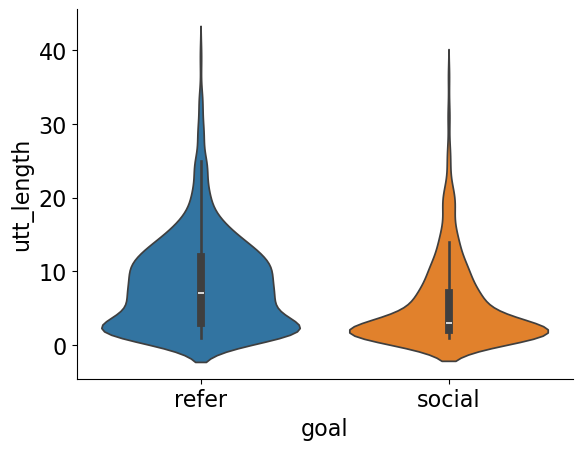

In [73]:
sns.violinplot(x="goal", y="utt_length", hue="goal", data=data)
sns.despine()

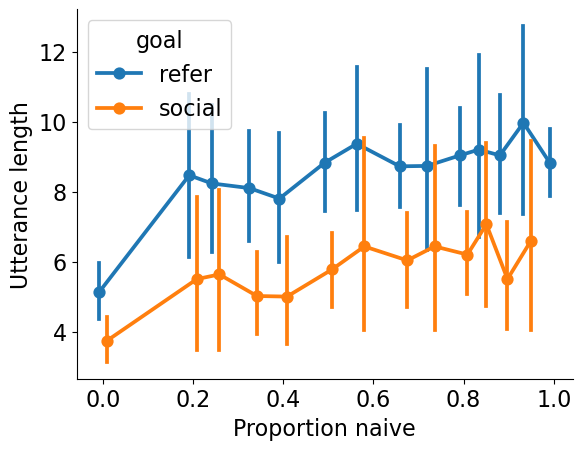

In [74]:
g = sns.pointplot(
    x="prop_naive", y="utt_length", hue="goal", data=data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Utterance length")
sns.despine()

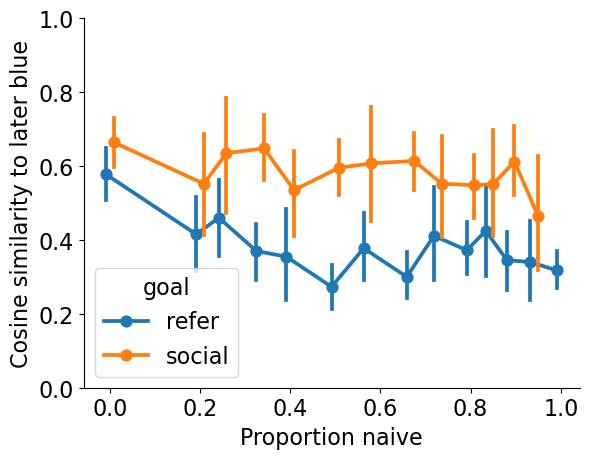

In [75]:
g = sns.pointplot(
    x="prop_naive", y="sbert_cosine_later_blue", hue="goal", data=data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Cosine similarity to later blue")
g.set_ylim(0, 1)
sns.despine()

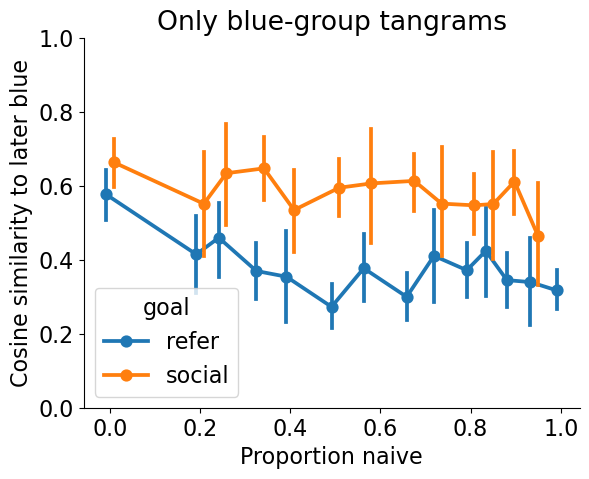

In [76]:
# Filter to only blue tangrams
filtered_data = data[(data["selected_tangram_group"] == "blue_specific") | (data["selected_tangram_group"] == "shared")]

# Plot cosine similarity to later blue
g = sns.pointplot(
    x="prop_naive", y="sbert_cosine_later_blue", hue="goal", data=filtered_data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Cosine similarity to later blue")
g.set_ylim(0, 1)
g.set_title("Only blue-group tangrams")
sns.despine()

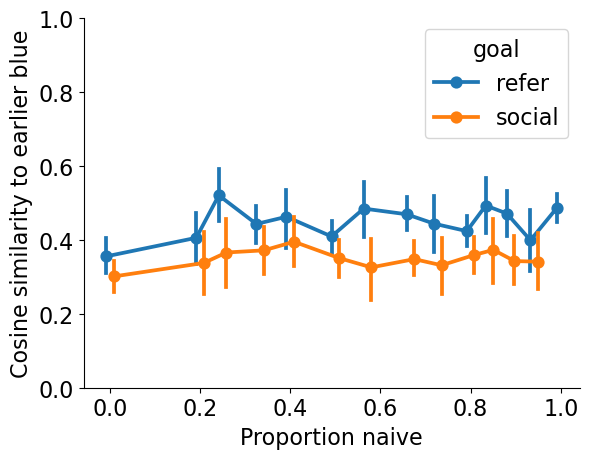

In [77]:
g = sns.pointplot(
    x="prop_naive", y="sbert_cosine_earlier_blue", hue="goal", data=data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Cosine similarity to earlier blue")
g.set_ylim(0, 1)
sns.despine()

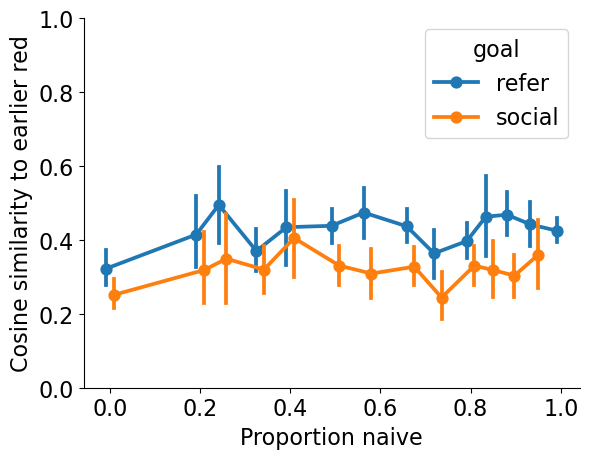

In [78]:
g = sns.pointplot(
    x="prop_naive", y="sbert_cosine_earlier_red", hue="goal", data=data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Cosine similarity to earlier red")
g.set_ylim(0, 1)
sns.despine()

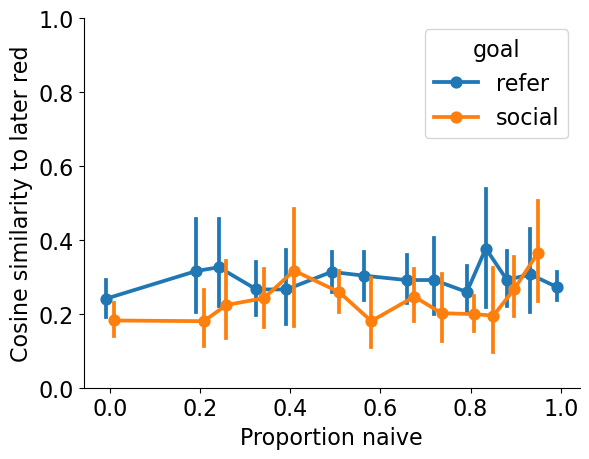

In [79]:
g = sns.pointplot(
    x="prop_naive", y="sbert_cosine_later_red", hue="goal", data=data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Cosine similarity to later red")
g.set_ylim(0, 1)
sns.despine()

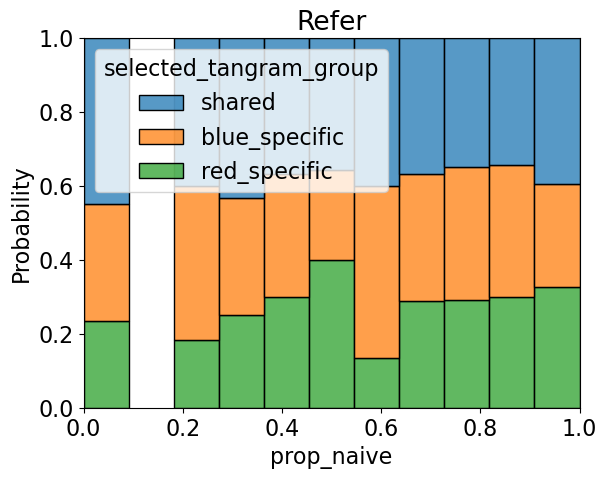

In [80]:
sns.histplot(
    x="prop_naive",
    hue="selected_tangram_group",
    hue_order=["shared", "blue_specific", "red_specific"], 
    multiple="fill",
    stat="probability",
    data=data[data["goal"] == "refer"]
)
plt.title("Refer")
plt.show()

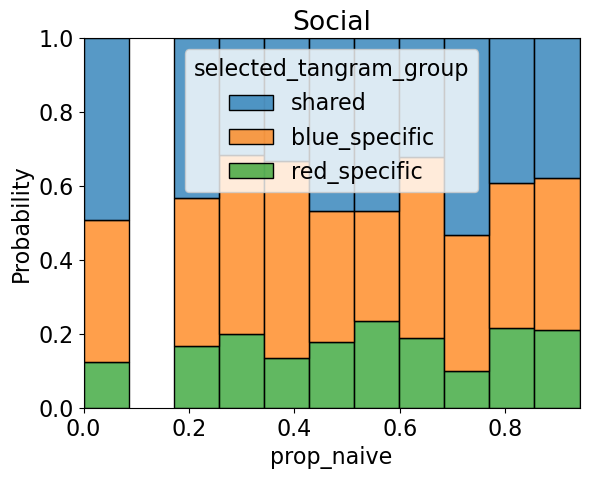

In [81]:
sns.histplot(
    x="prop_naive",
    hue="selected_tangram_group",
    hue_order=["shared", "blue_specific", "red_specific"], 
    multiple="fill",
    stat="probability",
    data=data[data["goal"] == "social"]
)
plt.title("Social")
plt.show()